<a href="https://colab.research.google.com/github/pritish1906/Recognizance-23/blob/main/RecognizancePS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train_data.csv")
df = df.drop(['Datetime'],axis = 1)

# df.head(5)
print(df.isnull().sum())

Temperature            0
Humidity               0
Zephyr                 0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerConsumption       0
dtype: int64


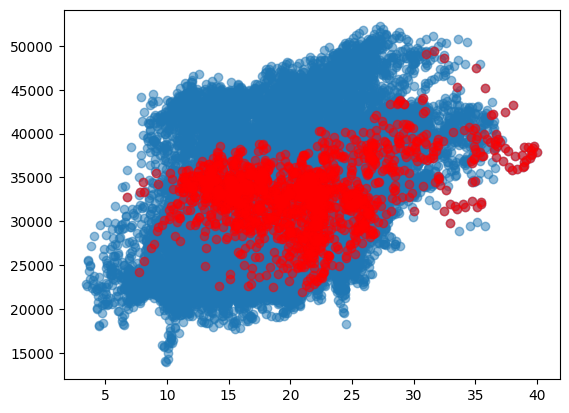

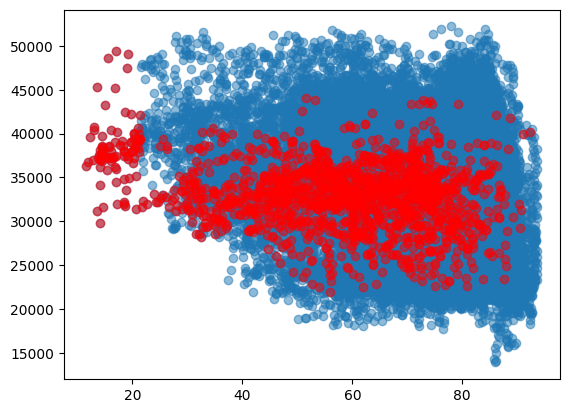

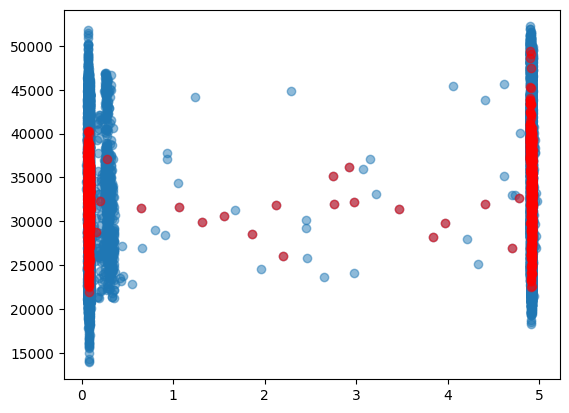

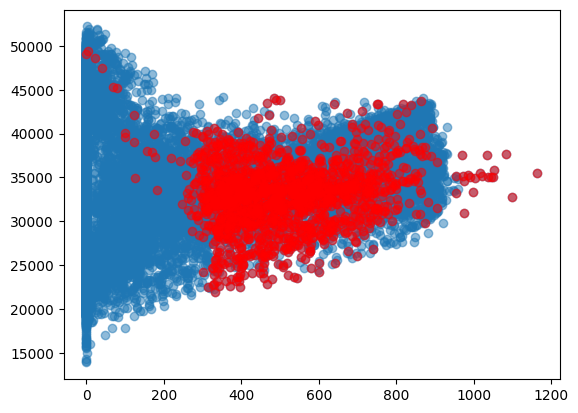

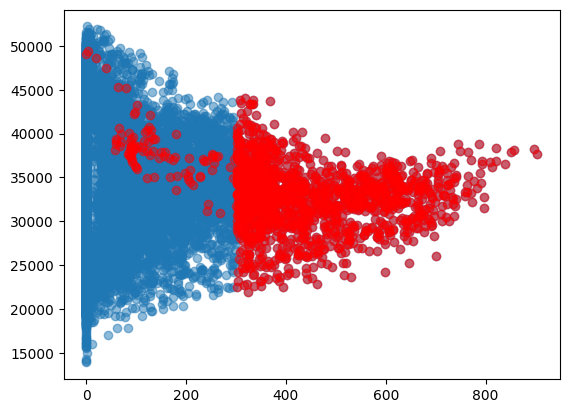

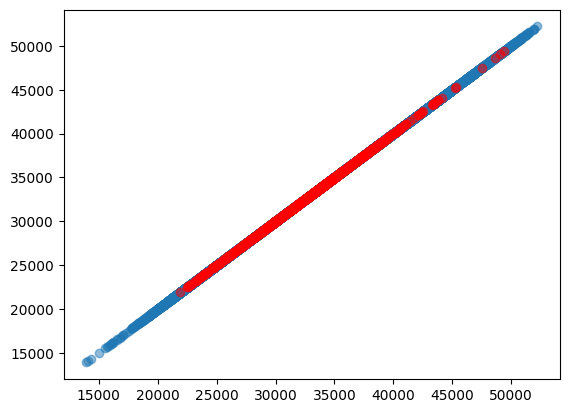

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

for field in df.columns:
  # Plot a scatter plot of temperature vs. power consumption
  plt.scatter(df[field], df["PowerConsumption"], alpha=0.5)

  # Highlight the outliers in red
  plt.scatter(df.loc[outliers, field], df.loc[outliers, "PowerConsumption"], color="red", alpha=0.5)
  # Show the plot
  plt.show()




In [ ]:
X = df.drop(['PowerConsumption'], axis=1)
Y = df['PowerConsumption']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)


y_pred = lr_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: {:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Root Mean squared error: 6474.44
R2 Score: 0.20
